Diana Rivero 

Datos 3B

# EDA for Kaggle

In [1]:
## importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Importing Datasets 

ds1 = pd.read_csv("student-mat.csv")
ds2 = pd.read_csv("student-por.csv")


In [3]:
## Exploring data 
ds1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
ds2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Rename columns

In [5]:
ds1.rename(columns={'G1':'G1_m', 'G2':'G2_m', 'G3':'G3_m'}, inplace=True)

In [6]:
ds2.rename(columns={'G1':'G1_p', 'G2':'G2_p', 'G3':'G3_p'}, inplace=True)

### merge data sets

In [7]:
## Merge datasets 
merge = pd.merge(ds1, ds2, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'])
merge= merge.drop_duplicates()

In [8]:
## school
ds1.school.value_counts(normalize=True)

GP    0.883544
MS    0.116456
Name: school, dtype: float64

In [10]:
print("%s%% of the students are in Gabriel Pereira school" % (100*round(ds1.school.value_counts(normalize=True)[0],4)))

88.35% of the students are in Gabriel Pereira school


In [12]:
## sex
ds1.sex.value_counts(normalize=True)

F    0.526582
M    0.473418
Name: sex, dtype: float64

In [14]:
print("%s%% of the students are girls" % (100*round(ds1.sex.value_counts(normalize=True)[0],4)))

52.66% of the students are girls


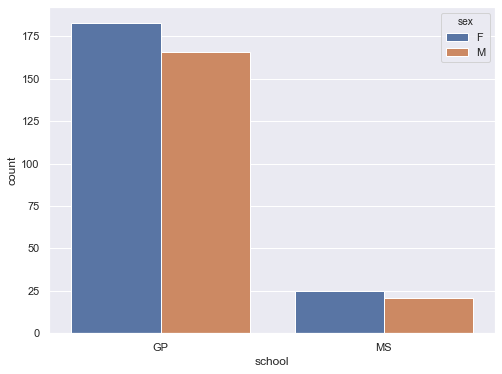

In [16]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x="school", hue ="sex", data=ds1)

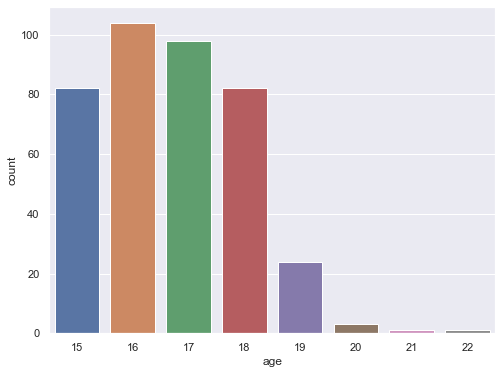

In [17]:
##age
sns.countplot(ds1.age)

In [19]:
##adress
ds1.address.value_counts(normalize=True)

U    0.777215
R    0.222785
Name: address, dtype: float64

In [20]:
print("%s%% of the students live in an urban area" % (100*round(ds1.address.value_counts(normalize=True)[0],4)))

77.72% of the students live in an urban area


In [21]:
## 
ds1.famsize.value_counts(normalize=True)

GT3    0.711392
LE3    0.288608
Name: famsize, dtype: float64

In [23]:
print("%s%% of the students live in a family with more than 3 members" % (100*round(ds1.famsize.value_counts(normalize=True)[0],4)))

71.14% of the students live in a family with more than 3 members


## function that multiplies each element of the list by 10

In [24]:
def times10(x):
    if type(x) is int:
        return 10 * x
    return x

In [26]:
ds1.applymap(times10).head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1_m,G2_m,G3_m
0,GP,F,180,U,GT3,A,40,40,at_home,teacher,...,40,30,40,10,10,30,60,50,60,60
1,GP,F,170,U,GT3,T,10,10,at_home,other,...,50,30,30,10,10,30,40,50,50,60
2,GP,F,150,U,LE3,T,10,10,at_home,other,...,40,30,20,20,30,30,100,70,80,100
3,GP,F,150,U,GT3,T,40,20,health,services,...,30,20,20,10,10,50,20,150,140,150
4,GP,F,160,U,GT3,T,30,30,other,other,...,40,30,20,10,20,50,40,60,100,100
5,GP,M,160,U,LE3,T,40,30,services,other,...,50,40,20,10,20,50,100,150,150,150
6,GP,M,160,U,LE3,T,20,20,other,other,...,40,40,40,10,10,30,0,120,120,110
7,GP,F,170,U,GT3,A,40,40,other,teacher,...,40,10,40,10,10,10,60,60,50,60
8,GP,M,150,U,LE3,A,30,20,services,other,...,40,20,20,10,10,10,0,160,180,190
9,GP,M,150,U,GT3,T,30,40,other,other,...,50,50,10,10,10,50,0,140,150,150
